# 과제 10-5장 Linear Regression - 자전거 통행량 예측

시애틀 프리몬트 다리를 지나는 자전거 통행량을 날씨와 계절, 기타 요인에 따라 예측하시오. (p436 참고)

<img src="https://images.seattletimes.com/wp-content/uploads/2020/01/01022020_bike-count_114545.jpg?d=2040x1360" width=400>

Ken Lambert, "Bike ridership hits record highs on 2 Seattle routes", The Seattle Times, Jan. 6, 2020

1. 교재에서 제공하는 FremontBridge.csv 파일과 SeattleWeather.csv 파일을 읽어 pandas 의 DataFrame 을 각각 생성하시오. (https://github.com/jakevdp/bicycle-data)

In [33]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True).sort_index()
weather = pd.read_csv('SeattleWeather.csv', index_col='DATE', parse_dates=True).sort_index()

C:\Users\user\AppData\Local\Temp\ipykernel_11876\3122500661.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True).sort_index()


2. 2020 년 이전 데이터만 선택하시오.

In [ ]:
b_day_df = b_df

In [34]:
counts = counts[counts.index < "2020-01-01"]
weather = weather[weather.index < "2020-01-01"]

3. 일별 총 자전거 통행량을 계산하고, 그 계산 결과를 'counts' 컬럼에 추가하시오.

In [35]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]   # 다른 열 삭제

4. 월요일~일요일까지 요일을 이진 데이터로 각각 인코딩 하고, 그 결과를 요일을 나타내는 컬럼들(7개)에 추가하시오.

In [36]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
  daily[days[i]] = (daily.index.dayofweek == i).astype(float)

5. 공휴일 여부를 이진 데이터로 인코딩 하고, 그 결과를 'holiday' 컬럼에 추가하시오.

In [37]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2020')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11876\3085141007.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily['holiday'].fillna(0, inplace=True)


6. 일자별 평균 날씨 (TAVG) 를 계산한 후, 'temp' 컬럼에 추가하시오.

In [38]:
weather['Temp (F)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])


7. 일자별 강수량(PRCP)을 계산한 후, 'rainfall' 컬럼에 추가하시오.

In [39]:
weather['Rainfall (in)'] = weather['PRCP']

daily = daily.join(weather[['Rainfall (in)', 'Temp (F)']])

In [40]:
# daily['annual'] = (daily.index - daily.index[0]).days / 365.

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,Rainfall (in),Temp (F)
Date,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,56.5
2012-10-05,12592.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,59.5
2012-10-06,8024.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.5
2012-10-07,8568.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,60.5


8. 데이터에서 NA 를 제거하시오.

In [41]:
# 널 값을 갖는 행은 모두 제거
daily.dropna(axis=0, how='any', inplace=True)

9. LinearRegression 모델을 이용하여 자전거 통행량을 예측하시오.

In [43]:
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'Rainfall (in)', 'Temp (F)']
X = daily[column_names]
y = daily['Total']

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

10. Matplotlib 를 이용하여 예측 결과를 시각화 하시오.

<Axes: xlabel='Date'>

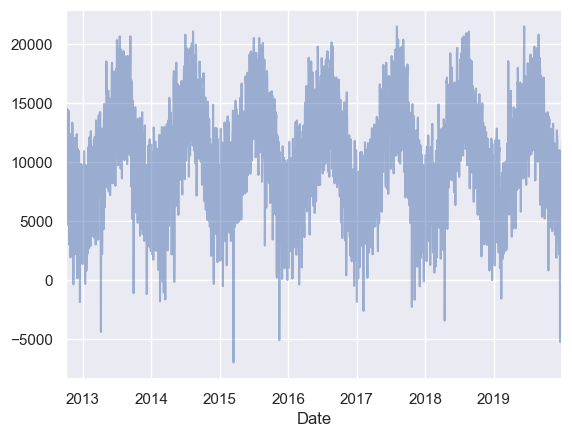

In [44]:
daily['predicted'].plot(alpha=0.5)
